In [74]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from classy import Class
from scipy import interpolate
import scipy
import scipy.special
import scipy.integrate
import scipy.constants as const
phi_golden = const.golden_ratio

In [75]:
# esthetic definitions for the plots
font = {'size'   : 14, 'family':'STIXGeneral'}
axislabelfontsize='large'
matplotlib.rc('font', **font)
# matplotlib.mathtext.rcParams['legend.fontsize']='medium'
plt.rcParams["figure.figsize"] = [6.0*phi_golden,6.0]

In [76]:
n_s_list = [0.8, 0.85, 0.9, 0.95, 1.0, 1.05]

In [77]:
# Varying parameter (others fixed to default)
#
fixed_settings = {
                'T_cmb':2.7255,
                'omega_b':0.02238280,
                'omega_cdm':0.1201075,
                'h':0.67810,
                'A_s':2.100549e-09,
                # 'n_s':0.9660499,
                # 'output':'tCl'
                'output':'tCl,pCl,lCl',
                'lensing':'yes'
                # 'k_output_values':0.01,
                # 'format':'camb'
                }

In [78]:
cosmo = {}
raw_cl = []
for i, k in enumerate(n_s_list):
    # print(k)
    cosmo[i] = Class()
    cosmo[i].set(fixed_settings)
    cosmo[i].set({'n_s': k})
    cosmo[i].compute()
    raw_cl = np.append(raw_cl, cosmo[i].raw_cl(2000))
    cosmo[i].struct_cleanup()

## CMB Spectra

In [58]:
# l=np.array(range(2,2501))

raw_cl = cosmo.raw_cl(2500)
# lensed_cl = cosmo.lensed_cl(2500)
# print(raw_cl.keys())
cosmo.struct_cleanup()

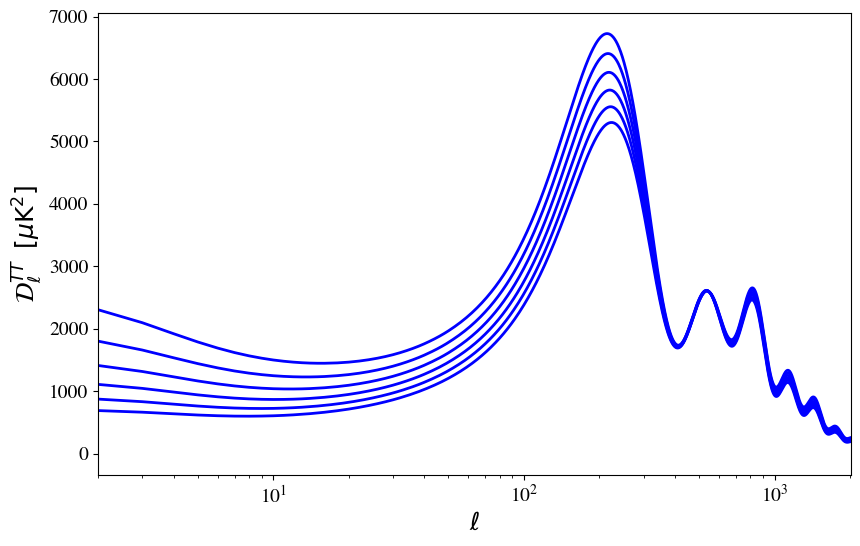

In [79]:
for i, k in enumerate(n_s_list):
    l = raw_cl[i]['ell'][1:]
    Cl_TT = raw_cl[i]['tt'][1:]

    factor = l*(l+1)/(2*np.pi)*cosmo[0].T_cmb()**2*1e12

    plt.semilogx(l, factor*Cl_TT, color='b',lw=2)
    
plt.xlim(2,2010)
plt.ylabel(r'$\mathcal{D}_\ell^{TT}\,\,\,[\mu\mathrm{K}^2]$',fontsize=18)

plt.xlabel(r"$\ell$",fontsize=18)
plt.show()

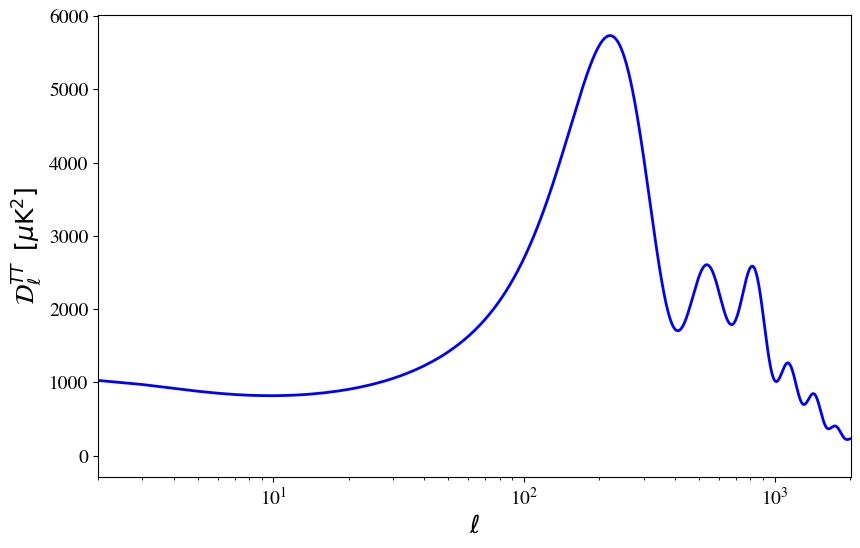

In [59]:
# Plotting CMB TT spectrum

l = raw_cl['ell'][1:]
Cl_TT = raw_cl['tt'][1:]

factor = l*(l+1)/(2*np.pi)*cosmo.T_cmb()**2*1e12

plt.semilogx(l, factor*Cl_TT, color='b',lw=2)
plt.xlim(2,2010)
plt.ylabel(r'$\mathcal{D}_\ell^{TT}\,\,\,[\mu\mathrm{K}^2]$',fontsize=18)

plt.xlabel(r"$\ell$",fontsize=18)
plt.show()


# plt.savefig('Cls.pdf')